### Universidade Federal do Rio Grande do Sul (UFRGS)  
#### Programa de Pós-Graduação em Engenharia Civil (PPGEC) 
#### PEC00025: Introdução à teoria de vibrações

#### TRABALHO 1 

---
_William Teixeira Damé da Silva (00312137)._   
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy


[1.   Introdução.](#section_1)

[2.   Metodologia e coleta de dados.](#section_2) 

[3.   Dados do problema proposto](#section_3)

[4.   Pseudo aceleração](#section_4)  

[5.   Periodograma de input](#section_5)  

[6.   Periodograma de output](#section_33)  

[7.   Considerações finais](#section_4)  

## 1. Introdução<a name="section_1"></a> 

O presente documento faz parte das avaliações da disciplina de Introdução à teoria de vibrações e visa demonstrar a resposta de parte da passarela localizada próxima a rótula João Belchior Marques Goulart, que foi submetida excitações na sua base.
   

## 2. Metodologia e coleta de dados<a name="section_2"></a> 

Para realizar a medição, foi utilizado um aparelho smartphone com o aplicativo iNVH versão 2.2.1, da empresa Bosch. O objeto medido em questão, foi a passarela para pedestres, composta de de estrutura metálica, localizada próximo a rótula João Belchior Marques Goulart, na nova orla do guabia.

O aparelho foi posto deitado na base da passarela, e esta foi submetida a impulsos causados por duas pessoas que saltavam sobre ela a cada período de tempo não especificado, conforme as figuras I e II a seguir:

<img src="data/fig1.jpg" width="480" height="480"/>



<center> Figura I - Vista lateral da passarela

    
<img src="data/fig22.jpg" width="480" height="480"/>



<center> Figura II - Smartphone posicionado para medição

O aplicativo utilizado para a medição dos ruídos e vibrações operou em uma frequência de 100 Hz, gerando um arquivo em formato ".CSV". Esses dados coletados foram utilizados para demonstrar o gráficos e resultados presentes neste trabalho.

Para efeito de cálculo e demonstração gráfica neste trabalho, utilizou-se da rotina chamada de "MRPy", produzida pelo professor desta disciplina, Prof. Dr. Marcelo Maia Rocha.

Os três gráficos abaixo representam os dados coletados nas posições x, y e z, correspondentes nesta mesma ordem a az1, az2 e az3.  

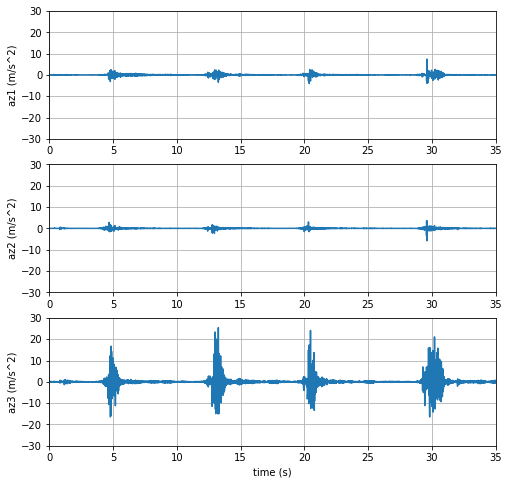

In [3]:
data = MRPy.from_file('data/dadosmedI', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(1, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-30, 30);
    plt.ylabel('az{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');



O gráfico abaixo representa a resposta da estrutura na direção "z", ou seja, direção vertical. Conforme o problema proposto, será o único utilizado nesse trabalho.

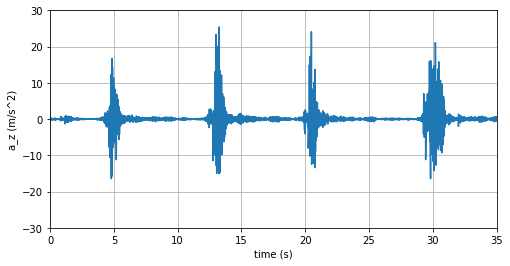

In [4]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-30, 30);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 



## 3. Dados do problema proposto<a name="section_3"></a> 

O presente trabalho representa uma estrutura com 1 grau de liberdade. Os dados escolhidos para o exercício foram um sistema partindo do deslocamento zero assim como a velocidade inicial zero. A massa do sistema é 5kg, o amortecimento 0.1 e a variação entre 0.1 e 15 segundos com mil pontos. 

In [4]:
m  = 5.0                            # system mass in kg
tn = np.linspace(0.1, 15, 1000)     # Estimated period in s
fn = 1.0/tn                         # natural frequency in Hz
zt = 0.01                           # damping as ratio of critical
u0 = 0.                             # initail displacement
v0 = 0.                             # initial velocity

## 4. Pseudo aceleração<a name="section_4"></a> 

Utilizando-se da rotina "MRPy", foi calculado o descolamento através da Integral de Duhamel para as frequências do sistema, variando entre 0.1 e 15 segundos. Logo abaixo, pode-se visualizar o gráfico com os picos de deslocamento pelo tempo.

À partir do gráfico dos deslocamentos, é possível calcular 𝑎𝑝 = 𝜔2 𝑢𝑃 e obter o espectro da pseudo aceleração em função do tempo.

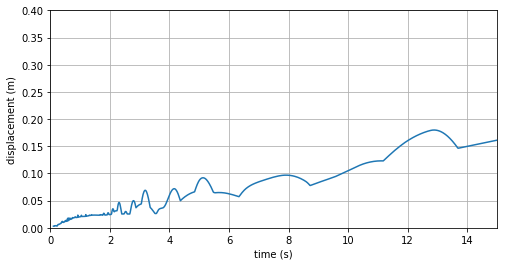

In [5]:
umax = np.zeros(fn.shape)

for k, f in enumerate(fn):
    u = az.sdof_Duhamel(f, zt, u0, v0)/m
    umax[k] = u.max()

plt.figure(3, figsize=(8, 4), clear=True)
plt.plot(tn, umax)

plt.xlim(0, tn[-1]);      plt.xlabel('time (s)') 
plt.ylim(0, 0.4);   plt.ylabel('displacement (m)') 

plt.grid(True) 


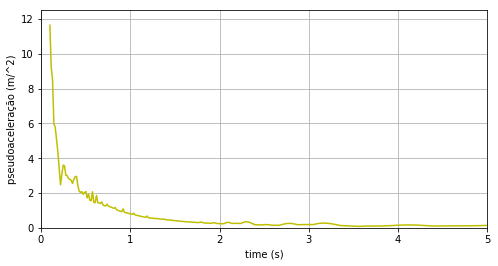

In [6]:
psal= ((2*np.pi*fn)**2)*umax
plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(tn, psal, 'y')

plt.xlim(0, 5);        plt.xlabel('time (s)') 
plt.ylim(0, 12.5);  plt.ylabel('pseudoaceleração (m/^2)') 

plt.grid(True) 


## 5. Periodograma de input<a name="section_5"></a> 

Utiliza-se novemente do gráfico do acelerograma na posição "z" para obtenção do periodograma.

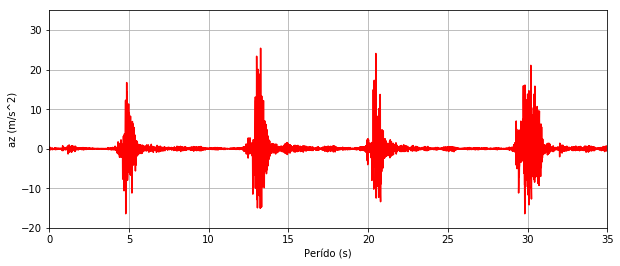

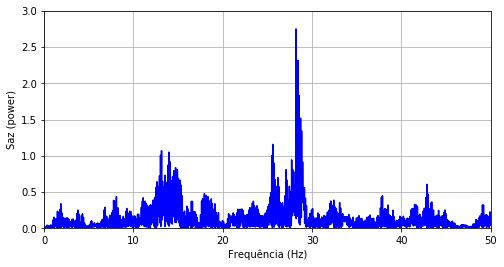

In [7]:
# Sinal do acelerômetro (az)

data = MRPy.from_file('data/dadosmedI', form='invh').zero_mean()
az = MRPy(data[2], data.fs)
t = az.t_axis()

plt.figure(5, figsize=(10, 4), clear=True)
plt.plot(t, az[0], 'r')

plt.xlim(0, az.Td);    plt.xlabel('Perído (s)')
plt.ylim(-20, 35);        plt.ylabel('az (m/s^2)')

plt.grid(True)

# Cálculo do periodograma de az

Saz, fs = az.periodogram()
f = az.f_axis()

plt.figure(6, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0],'b' )

plt.xlim(0, 50);    plt.xlabel('Frequência (Hz)')
plt.ylim(0, 3);    plt.ylabel('Saz (power)')

plt.grid(True)


Nota-se no gráfico do periodograma (em azul) uma forte densidade de energia por volta da frequência de 28 Hz, o que **pode** ser indicio de que essa é a frequência natural ou pode estar perto desse valor.




## 6.Periodograma de output<a name="section_6"></a> 

Para finalizar o trabalho, calcula-se o periodograma de output. Utilizou-se para o calculo um valor de frequência fixo de 28 Hz, encontrado no gráfico anterior. 

Primeiramente, calcula-se a integral de Duhamel em função do deslocamento na suposta frequência natural escolhida, e logo após, o periodograma dessa mesma frequência.

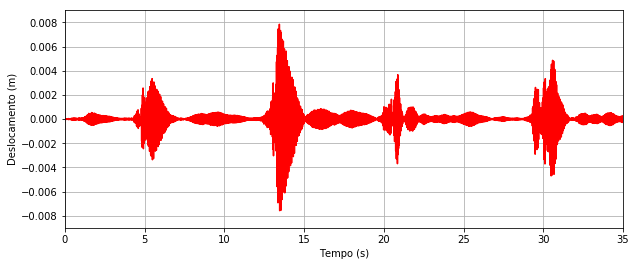

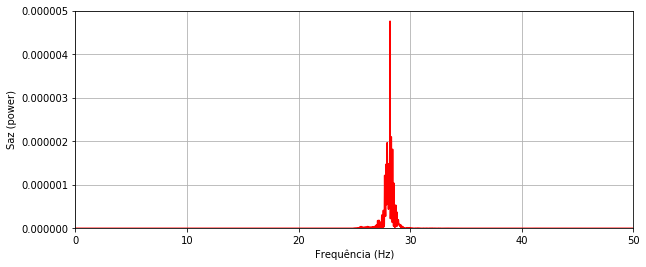

In [8]:
# Dados para Integral de Duhamel

m = 1           # Massa dos sitema =1 kg
zt = 0.01       # Amortecimento
fa = 28         # Frequência natural do sistema em Hz, escolhida a partir
u0 = 0.         # Deslocamento inicial
v0 = 0.         # Velocidade inicial

# Periodograma da resposta pela frequência natural

u_DH = az.sdof_Duhamel(fa, zt, u0, v0)/m

plt.figure(9, figsize=(10, 4), clear=True)
plt.plot(t, u_DH[0], 'r')
plt.xlim(0, az.Td); plt.xlabel('Tempo (s)')
plt.ylim(-0.009, 0.009); plt.ylabel('Deslocamento (m)')
plt.grid(True)

# Cálculo do periodograma da resposta de "u" para 28Hz

Saz, fs = u_DH.periodogram()

f = u_DH.f_axis()

plt.figure(10, figsize=(10, 4), clear=True)
plt.plot(f, Saz[0],'r' )

plt.xlim(0, 50);    plt.xlabel('Frequência (Hz)')
plt.ylim(0, 0.000005);    plt.ylabel('Saz (power)')

plt.grid(True)


## 7.Considerações finais<a name="section_7"></a> 

O presente trabalho foi composto pela fase de coleta de dados, na qual se fez necessário torna-se familiar com o aplicativo iNVH da Bosch e se deslocar até o local para fazer a medição. A segunda fase foi caracterizada pelo uso dos conhecimentos adquiridos na disciplina para obter os resultados. Utilizou-se tanto a ferramenta Python, com o módulo MRPy para efeito de cálculos e plotagem de gráficos, quanto a ferramenta Jupyter Notebook para esboçar e escrever este trabalho. 

Para efeito de cálculo, foi considerado o sitema com 1 grau de liberdade, na direção vertical (z). Pelo gráfico do periodograma foi possível concluir que a frequência de maior energia do sistema é por volta de 28hz. Ao final, ao utilizar-se da integral de Duhamel e plotar o gráfico do periodograma, foi possível obter a energia atribuída a essa frequência no sistema